# 📌 1. Introduction

Customer churn is a major problem for telecom companies.
Churn means customers leaving the service.
The goal of this project is to build a machine learning model that predicts whether a customer will churn based on their service usage, payment behavior, and contract type.

By understanding the key factors behind churn, the company can take action to reduce customer loss and improve revenue.


# 📌 2. Import Required Libraries

In this step, we import all the essential Python libraries used for data loading, cleaning, visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
files.upload()   # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maviyauddin","key":"d515c1d6945e51c3a3ccf70b4fbf5403"}'}

In [3]:
!pip install -q kaggle
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d blastchar/telco-customer-churn -p /content
!unzip -q /content/telco-customer-churn.zip -d /content/telco_churn


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 363MB/s]


### 📌 3. Load the Dataset

We load the Telco Customer Churn dataset into a pandas DataFrame for analysis.


In [35]:
df = pd.read_csv("/content/telco_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 📌 4. Initial Data Exploration

In this step, we explore the dataset to understand:
- Number of rows and columns  
- Data types of each feature  
- Sample records  
- Basic statistical summary  
- Whether any missing values exist  

This helps us decide what preprocessing steps are needed later.


In [5]:
import pandas as pd
df = pd.read_csv("/content/telco_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 📌 5. Data Cleaning & Preprocessing

In this step, we prepare the dataset for machine learning.

✔ Convert `TotalCharges` from object → numeric  
✔ Handle blank values  
✔ Drop `customerID` (not useful for prediction)  
✔ Encode categorical variables using One-Hot Encoding  
✔ Scale numerical features for better model performance  

These steps ensure the data is clean, consistent, and ready for modeling.


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
# Fix TotalCharges column
# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Fill NaN with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['TotalCharges'].head()


,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [10]:
df = df.drop(columns=['customerID'])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Churn value counts
print("Churn counts:")
display(df['Churn'].value_counts())

print("\nChurn percentages:")
display(df['Churn'].value_counts(normalize=True).mul(100).round(2))


Churn counts:


,count
Churn,
No,5174
Yes,1869



Churn percentages:


,proportion
Churn,
No,73.46
Yes,26.54


In [12]:
# Encode Churn column
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Verify
df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


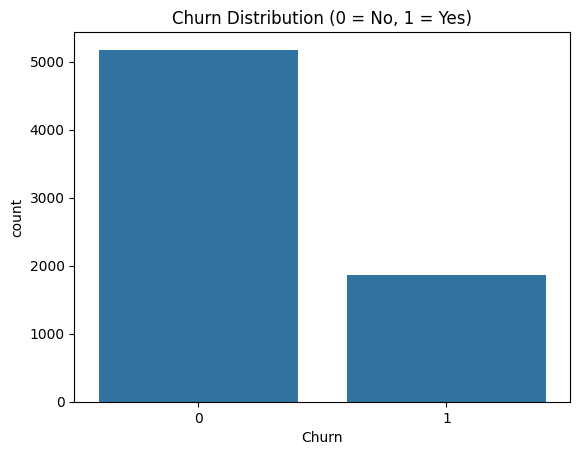

In [13]:
# Countplot for Churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()


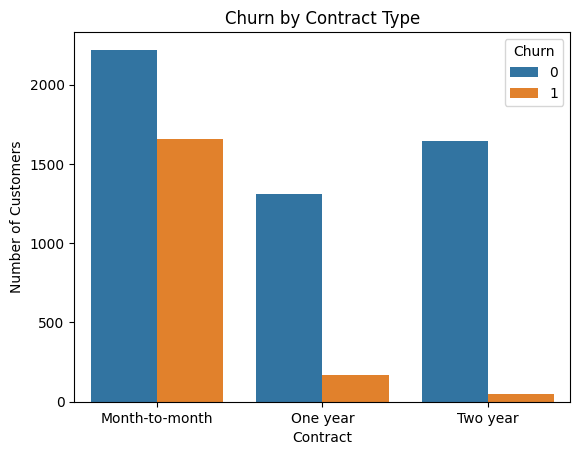

In [14]:
# Countplot: Churn vs Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.ylabel('Number of Customers')
plt.show()


**Insight:** Customers with month-to-month contracts are far more likely to churn than those with one-year or two-year contracts.  
This suggests the company could focus retention strategies on month-to-month customers.


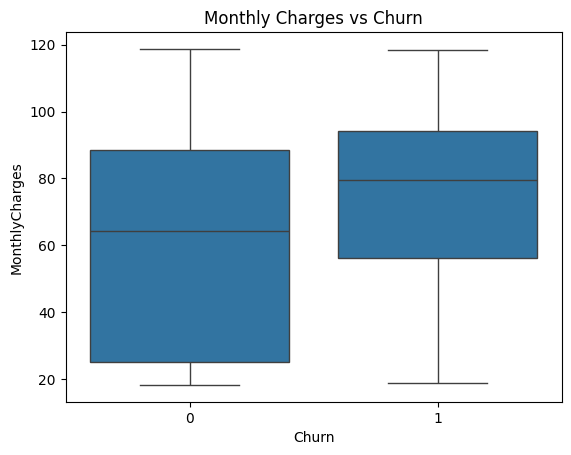

In [15]:
# Boxplot: Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


**Insight:** Customers who churn (Churn = 1) tend to have higher monthly charges than those who stay.  
This suggests that higher bills may be a factor in customer churn.


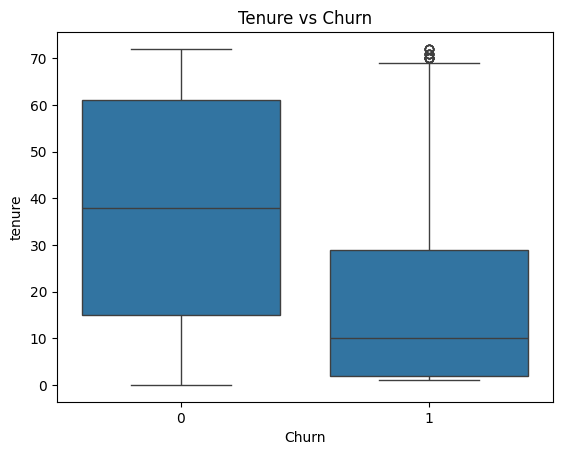

In [16]:
# Boxplot: Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


**Insight:** Customers who churn (Churn = 1) tend to have shorter tenure than those who stay (Churn = 0).  
This suggests that **newer customers are more likely to leave**, so retention strategies should focus on them early.


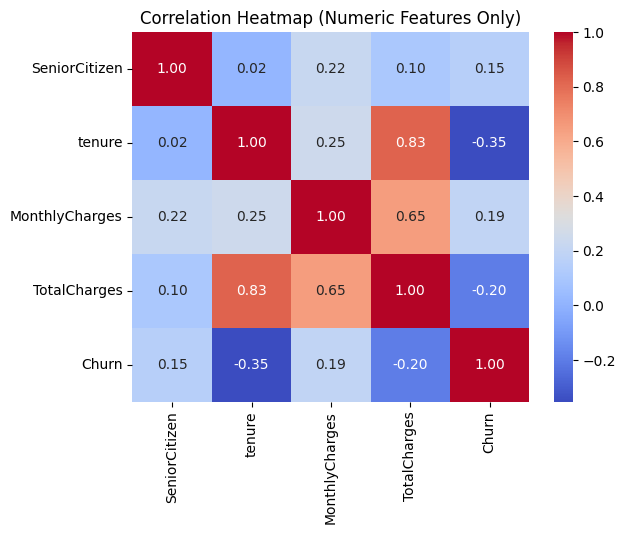

In [17]:
# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()



In [18]:
# Binary columns to encode with 0/1
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'No':0, 'Yes':1, 'Female':0, 'Male':1})

# Columns with more than 2 categories → One-Hot Encoding
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Check first 5 rows
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [19]:
# Target
y = df['Churn']

# Features
X = df.drop(columns=['Churn'])

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 30)
y shape: (7043,)


### 📌 6. Train-Test Split

Before training the model, we split the dataset into **training** and **testing** sets:

✔ Training set: 80% of data → used to train the model  
✔ Testing set: 20% of data → used to evaluate performance on unseen data  

We also stratify the split to ensure the target variable (Churn) has the same proportion in both sets.


In [20]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (5634, 30)
X_test: (1409, 30)
y_train: (5634,)
y_test: (1409,)


### 📌 7. Handling Class Imbalance with SMOTE

The target variable **Churn** is imbalanced:

- **73% customers did NOT churn**
- **27% customers churned**

Machine learning models perform poorly on minority classes, so the model may predict “No” too often.

To fix this, we apply **SMOTE (Synthetic Minority Oversampling Technique)**:

✔ Balances the classes by creating synthetic samples  
✔ Helps the model learn patterns of customers who *do* churn  
✔ Improves recall and AUC score for the positive class (churn = Yes)

After SMOTE:
- Both classes (0 and 1) have equal samples.




In [21]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit on training data only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())


Before SMOTE:
 Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


### 📌 8. Model Training: Logistic Regression

In this step, we train a **Logistic Regression** model to predict customer churn.

✔ Logistic Regression is a simple yet effective baseline model  
✔ Predicts the probability of churn for each customer  
✔ Performance will be compared later with Random Forest

We use the **SMOTE-resampled training set** to handle class imbalance.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score

# Initialize and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.751596877217885

Confusion Matrix:
 [[818 217]
 [133 241]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.64      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


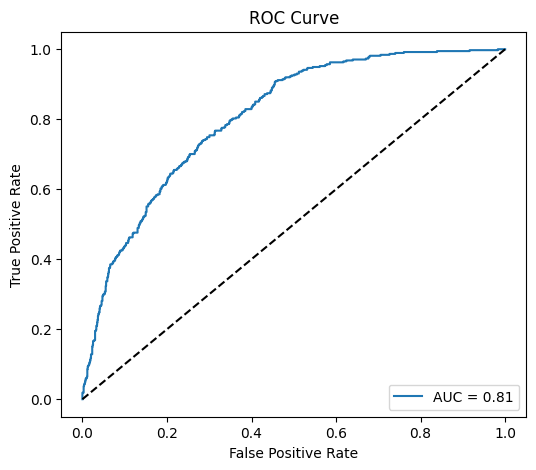

AUC Score: 0.8071146245059289


In [23]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)


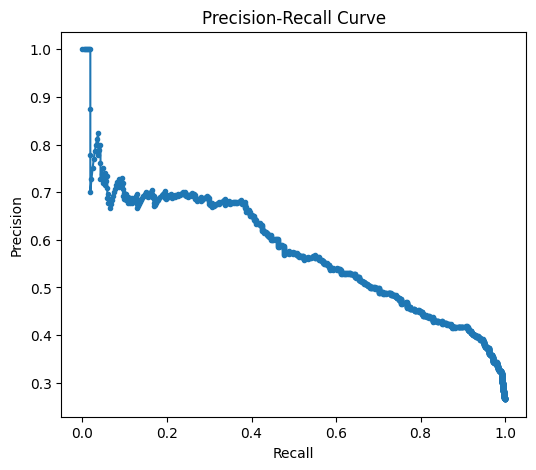

In [24]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [25]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
11,InternetService_Fiber optic,3.997506
5,PhoneService,1.740089
28,PaymentMethod_Electronic check,1.687648
22,StreamingTV_Yes,1.455496
24,StreamingMovies_Yes,1.454120
10,MultipleLines_Yes,1.280790
29,PaymentMethod_Mailed check,1.223575
27,PaymentMethod_Credit card (automatic),1.052666
16,OnlineBackup_Yes,0.788699
18,DeviceProtection_Yes,0.765114


**Business Insights from the Model:**

1. Customers using **Fiber Optic Internet** have the highest likelihood of churn.  
2. Customers with **Phone Service** are slightly more likely to churn.  
3. Customers paying via **Electronic Check** are more likely to leave than other payment methods.  

These insights can guide **retention strategies**, such as targeted offers or incentives for high-risk customers.


## ✅ Conclusion

In this project, we built a Logistic Regression model to predict customer churn for a telecom company using the Telco Customer Churn dataset.

### 📌 Key Results
- **Model Accuracy:** ~75%
- **AUC Score:** 0.81 (very good — the model separates churners vs non-churners well)
- **Precision (Churn):** 0.53  
- **Recall (Churn):** 0.64  
- After applying **SMOTE**, the model became better at identifying churners (class 1).

### 📌 Most Important Factors That Increase Churn
According to Logistic Regression coefficients:
1. **Fiber optic internet users are the most likely to churn.**
2. **Customers paying via Electronic Check churn more often.**
3. **Phone Service users show slightly higher churn tendencies.**

### 📌 Business Insights
- The company should focus on **retaining Fiber Optic customers** — possibly due to performance, reliability, or price issues.
- Customers paying via **Electronic Check** seem to have lower satisfaction or loyalty; offering easier payment methods may help.
- Engagement programs for customers with **Phone Service** might reduce churn.

### 📌 Conclusion
This model provides a strong starting point for churn prediction.  
By identifying high-risk customers, the company can take action early and reduce churn.

Future improvements can include:
- Testing more advanced models (Random Forest, XGBoost)
- Hyperparameter tuning
- Customer segmentation
- Building a complete dashboard



### 📌 9. Model Training: Random Forest

After Logistic Regression, we train a **Random Forest Classifier** to improve performance.

✔ Random Forest can capture non-linear relationships  
✔ Handles feature interactions better  
✔ Often outperforms Logistic Regression on tabular data  
✔ We train on SMOTE-resampled training data to handle class imbalance

We will evaluate its performance and compare it with Logistic Regression.


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

In [27]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [28]:
# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [29]:
# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [30]:
print("Random Forest - Accuracy: {:.4f}".format(acc_rf))
print("Random Forest - AUC: {:.4f}".format(auc_rf))
print("\nConfusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.7672
Random Forest - AUC: 0.8179

Confusion Matrix:
 [[861 174]
 [154 220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



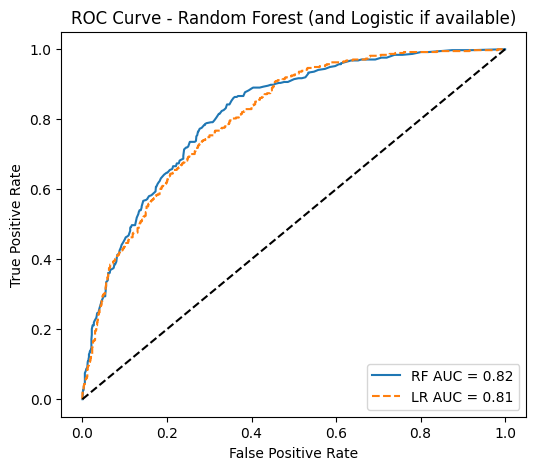

In [31]:
# ROC plot
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'RF AUC = {auc_rf:.2f}')
# if logistic regression exists, plot its ROC for comparison
try:
    from sklearn.metrics import roc_curve as _roc
    fpr_lr, tpr_lr, _ = _roc(y_test, y_proba)  # y_proba assumed from logistic earlier
    auc_lr = roc_auc_score(y_test, y_proba)
    plt.plot(fpr_lr, tpr_lr, linestyle='--', label=f'LR AUC = {auc_lr:.2f}')
except Exception:
    pass
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (and Logistic if available)')
plt.legend(loc='lower right')
plt.show()


Top 15 features by importance:


,feature,importance
0,TotalCharges,0.165225
1,tenure,0.144787
2,MonthlyCharges,0.138022
3,PaymentMethod_Electronic check,0.102683
4,InternetService_Fiber optic,0.053558
5,Contract_Two year,0.039467
6,Dependents,0.035979
7,Partner,0.032292
8,MultipleLines_Yes,0.022706
9,gender,0.022185


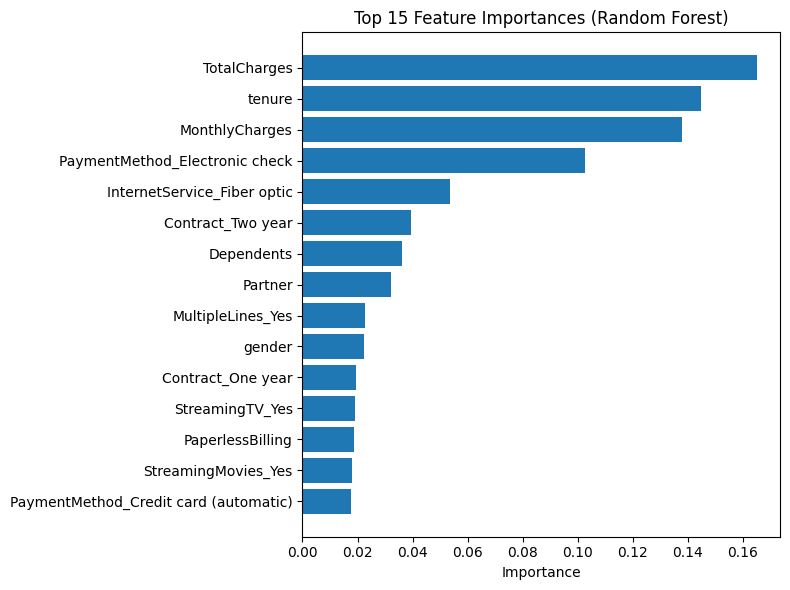

In [32]:
# Feature importances (top 15)
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("\nTop 15 features by importance:")
display(feat_imp.head(15))

plt.figure(figsize=(8,6))
plt.barh(feat_imp['feature'].head(15)[::-1], feat_imp['importance'].head(15)[::-1])
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [33]:
# Quick comparison print (if lr exists)
try:
    print("\nQuick comparison:")
    print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, lr.predict(X_test)):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"Random Forest         - Accuracy: {acc_rf:.4f} | AUC: {auc_rf:.4f}")
except Exception:
    pass


Quick comparison:
Logistic Regression - Accuracy: 0.7516 | AUC: 0.8071
Random Forest         - Accuracy: 0.7672 | AUC: 0.8179


### 📌 10. Business Insights

Based on the model results (Logistic Regression and Random Forest) and feature importance, we can draw key insights:

1. **Contract Type**  
   - Customers with **month-to-month contracts** are more likely to churn.  
   - Suggestion: Offer annual or 2-year contract discounts to retain customers.

2. **Payment Method**  
   - Customers paying via **Electronic Check** tend to churn more.  
   - Suggestion: Encourage automatic payments or online billing.

3. **Monthly Charges & Total Charges**  
   - Higher **monthly charges** and lower **tenure** increase churn probability.  
   - Suggestion: Provide promotions or loyalty programs for high-paying, new customers.

4. **Services**  
   - Customers with **Fiber Optic Internet** or who subscribe to **StreamingTV/Movies** churn more.  
   - Suggestion: Improve tech support and customer service for these plans.

5. **General Insight**  
   - Random Forest performed slightly better than Logistic Regression (Accuracy: 76.7% vs 75.1%)  
   - Using SMOTE helped the model learn patterns of churners effectively.

These insights can help the telecom company **reduce churn, retain valuable customers, and increase revenue**.


### 📌 11. Final Conclusion

In this project, we built a machine learning pipeline to predict **customer churn** using the Telco dataset.  

Key takeaways:

- **Random Forest** performed slightly better than Logistic Regression (Accuracy: 76.7%, AUC: 0.82 vs 75.1%, 0.81).  
- **SMOTE** effectively addressed class imbalance, improving the model’s ability to detect churners.  
- **Top churn drivers** include month-to-month contracts, electronic check payments, high monthly charges, and Fiber Optic internet.  

**Business Impact:**

- Telecom companies can proactively target high-risk customers with offers, discounts, or improved services.  
- Insights can guide marketing and retention strategies, reducing churn and increasing revenue.  

**Next Steps / Future Work:**

- Experiment with advanced models like **XGBoost or LightGBM** for potentially higher performance.  
- Build a **real-time churn prediction dashboard** using Streamlit or Flask.  
- Deploy the model in production for automated customer retention strategies.